# Lecture 13: Exact solutions and errors

## Exact derivatives and exact solutions

-   In some special cases it is possible to evaluate the derivative of a function exactly.

-   Similarly, in some special cases it is possible to solve a differential equation exactly.

-   In general, however, this is not the case and so numerical methods are required - this is what this module is concerned with.

-   The special, exact, cases are not what this module is about, however it is helpful to consider one or two examples.

### Example 1

-   Consider the function $y(t) = t^2$.

-   We can plot an estimate of the graph of $y'(t)$ quite easily in this case:

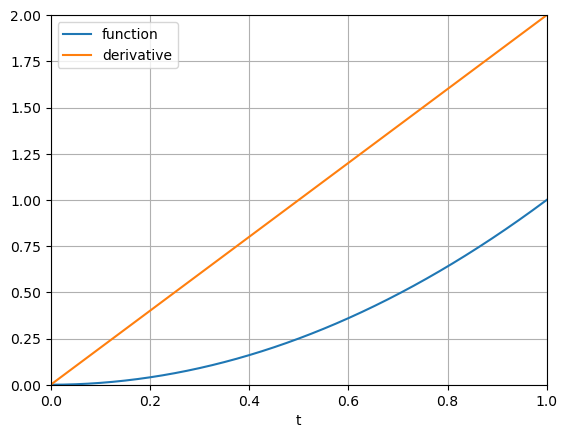

In [1]:
from matplotlib import pyplot as plt
import numpy as np


def f1(t):
    return t * t


def df1(t):
    return 2 * t


t_ = np.linspace(0, 1, 1000)
f_ = f1(t_)
df_ = df1(t_)

plt.plot(t_, f_, label="function")
plt.plot(t_, df_, label="derivative")

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 2.0)

plt.xlabel("t")

plt.legend()
plt.grid()
plt.show()

-   In fact we may use the definition of $y'(t)$ to evaluate this function at any point:

    $$
    y'(t) = \lim_{\mathrm{d}t \to 0} \frac{y(t + \mathrm{d}t) - y(t)}{\mathrm{d}t}.
    $$

-   When $y(t) = t^2$ we know that

    $$
    \begin{aligned}
    \frac{y(t + \mathrm{d}t) - y(t)}{\mathrm{d}t}
    & = \frac{(t + \mathrm{d}t)^2 - t^2}{\mathrm{d}t} \\
    & = \frac{t^2 + 2 \times t \times \mathrm{d}t + ( \mathrm{d}t )^2 - t^2}{\mathrm{d}t} \\
    & = 2 t + \mathrm{d}t.
    \end{aligned}
    $$

-   Taking the limit $\mathrm{d}t \to 0$, we see that $y'(t) = 2t$.

### Example 2

-   Similarly, when $y(t) = t^3$ we have

    $$
    \begin{aligned}
    \frac{y(t + \mathrm{d}t) - y(t)}{\mathrm{d}t}
    & = \frac{(t + \mathrm{d}t)^3 - t^3}{\mathrm{d}t} \\
    & = \frac{t^3 + 3 \times t^2 \times \mathrm{d}t + 3 \times t \times (\mathrm{d}t)^2 + (\mathrm{d}t)^2 - t^3}{\mathrm{d}t} \\
    & = 3 \times t^2 + 3 \times t \times \mathrm{d}t + (\mathrm{d}t)^2.
    \end{aligned}
    $$

-   Now taking the limit as $\mathrm{d}t \to 0$ we see that, in this case $y'(t) = 3t^2$.

-   In general, we may show that when $y(t) = t^m$, then $y'(t) = m t^{m-1}$.

### Example 3

-   By working backwards from a known expression for $y(t)$ and $y'(t)$ we can make up our own differential equation that has $y(t)$ as a known solution.

-   e.g., when $y(t) = t^3$:

    $$
    y'(t) = 3 t^2 = 3y(t) / t.
    $$

-   Hence we know the solution to the following equation:

    $$
    y'(t) = 3 y(t) / t \quad \text{ subject to } \quad y(1) = 1.
    $$

-   If we solve this for values of $t$ between $1.0$ and $2.0$, say, then we know that exact answer when $t = 2.0$ is $y(2) = 8$.

## Errors in Euler's method

-   We can solve this problem using Euler's method and then look at the errors when $t = 2.0$.

In [2]:
import pandas as pd

headers = ["n", "dt", "solution", "abs. error", "ratio"]
data = []


def euler(f, n, dt, t0, y0, T):
    t = np.double(t0)
    y = np.double(y0)

    for i in range(n):
        y += dt * f(t, y)
        t += dt

    return y


t0 = 1.0
y0 = 1.0
T = 2.0


def f(t, y):
    return 3 * y / t


exact = 8.0

old_error = None

for n in [10, 20, 40, 80, 160, 320, 640]:
    dt = (T - t0) / n
    y = euler(f, n, dt, t0, y0, T)
    error = abs(y - exact)

    if old_error is not None:
        ratio = error / old_error
    else:
        ratio = "---"

    old_error = error

    data.append([n, dt, y, error, ratio])

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Results of using Euler's method varying dt")

AttributeError: 'Styler' object has no attribute 'hide_index'

-   What is happening to the error as $\mathrm{d}t \to 0$?

    -   It is decreasing
    -   Each time $\mathrm{d}t$ is halved the error is halved.
    -   The error is proportional to $\mathrm{d}t$.

-   What might we expect the computed solution to be if we halved $\mathrm{d}t$ one more time?

### Big O Notation

-   In considering algorithm complexity you have already seen this notation. For example:

    -   Gaussian elimination requires $O(n^3)$ operations when $n$ is large.
    -   Backward substitution requires $O(n^2)$ operations when $n$ is large.

-   For large values of $n$ the *highest* powers of $n$ are the most significant.

-   For smaller values of $\mathrm{d}t$, it is the *lowest* powers of $\mathrm{d}t$ that are the most significant:

    -   when $\mathrm{d}t = 0.001$, $\mathrm{d}t$ is much bigger than $(\mathrm{d}t)^2$ for example.

-   We can make use of the "big O" notation in either case.

-   For example, suppose $f(x) = 2 x^2 + 4 x^3 + x^5 + 2 x^6,$
    -   then $f(x) = O(x^6)$ as $x \to \infty$
    -   and $f(x) = O(x^2)$ as $x \to 0$.

-   In this notation, we can say that **the error in Euler's method is $O(\mathrm{d}t)$**.

## Improving upon Euler's method

-   Let's assume that the error in Euler's method is proportional to $\mathrm{d}t$.

-   Then halving $\mathrm{d}t$ will halve the error.

-   Suppose the error in taking one step of size $\mathrm{d}t$ is $E$, call this solution $\alpha$, then taking two steps of size $\frac{1}{2} \mathrm{d}t$ should yield and error of $E/2$, call this solution $\beta$:

    $$
    \begin{aligned}
    \alpha - y_{\text{exact}} = E
    \beta - y_{\text{exact}} = E/2.
    \end{aligned}
    $$

-   Subtracting twice the second equation from the first gives:

    $$
    y_{\text{exact}} = 2 \beta - \alpha,
    $$

	which should be an improved approximation.

We use this idea to derive a improve numerical scheme.

### The midpoint scheme

-   To get $\alpha$ take a single step of size $\mathrm{d}t$:

	$$
	\alpha = y^{(i)} + \mathrm{d}t f(t^{(i)}, y^{(i)}).
	$$

-   To get $\beta$ take two steps of size $\mathrm{d}t/2$:

	$$
	\begin{aligned}
	k & = y^{(i)} + (\mathrm{d}t / 2) f(t^{i}, y^{(i)}) \\
	m & = t^{(i)} + \mathrm{d}t / 2 \\
	\beta & = k + (\mathrm{d}t / 2) f(m, k).
	\end{aligned}
	$$

-   Combining $\alpha$ and $\beta$ as suggested the slide before last gives

    $$
    \begin{aligned}
	y^{(i+1)} & = 2 \beta - \alpha \\
	& = 2 (k + (\mathrm{d}t/2) f(m, k) )- (y^{(i)} + \mathrm{d}t f(t^{(i)}, y^{(i)}))
	&& \text{(sub for $\alpha$ and $\beta$)} \\
	& = 2 k - y^{(i)} + \mathrm{d}t (f(m, k) - f(t^{(i)}, y^{(i)}))
	&& \text{(rearrange)} \\
	& = 2 (y^{(i)} + (\mathrm{d}t / 2) f(t^{(i)}, y^{(i)})) - y^{(i)} \\
	& \qquad  + \mathrm{d}t (f(m, k) - f(t^{(i)}, y^{(i)}))
    && \text{(sub for $k$)} \\
	& = y^{(i)} + \mathrm{d}t f(m, k)
	&& \text{(rearrange and cancel terms)}.
	\end{aligned}
    $$

-   As a computational algorithm this gives an algorithm:

	1. Initialise starting values $t^{(0)}$ and $y^{(0)}$.
	2. Loop over all time steps, until the final time, updating using the formulae:

	$$
	\begin{aligned}
	k & = y^{(i)} + (\mathrm{d}t / 2) f(t^{(i)}, y^{(i)}) \\
	m & = t^{(i)} + \mathrm{d}t / 2 \\
	y^{(i+1)} & = y^{(i)} + \mathrm{d}t f(m, k) \\
	t^{(i+1)} & = t^{(i)} + \mathrm{d}t.
	\end{aligned}
	$$
    ``` python
    for i in range(n):
        y_mid = y[i] + 0.5 * dt * f(t[i], y[i])
        t_mid = t[i] + 0.5 * dt
        y[i+1] = y[i] + dt * f(t_mid, y_mid)
        t[i+1] = t[i] + dt
    ```

### Results

-   The following tables shows computed results for the final solution, at $t = 2.0$.

In [ ]:
import pandas as pd

headers = ["n", "dt", "solution", "abs. error", "ratio"]
data = []


def midpoint(f, n, dt, t0, y0, T):
    t = np.double(t0)
    y = np.double(y0)

    for i in range(n):
        k = y + (dt / 2) * f(t, y)
        m = t + dt / 2
        y += dt * f(m, k)
        t += dt

    return y


t0 = 1.0
y0 = 1.0
T = 2.0


def f(t, y):
    return 3 * y / t


exact = 8.0

old_error = None

for n in [10, 20, 40, 80, 160, 320, 640]:
    dt = (T - t0) / n
    y = midpoint(f, n, dt, t0, y0, T)
    error = abs(y - exact)

    if old_error is not None:
        ratio = error / old_error
    else:
        ratio = "---"

    old_error = error

    data.append([n, dt, y, error, ratio])

df = pd.DataFrame(data, columns=headers)
df.style.hide_index().set_caption("Results of using the midpoint method varying dt")

### Notes

-   For this new scheme we see that the error *quarters* each time that the interval $\mathrm{d}t$ is *halved*.

-   That is the error is approximately proportional to $(\mathrm{d}t)^2$.

-   Equivalently, the error is $O(\mathrm{d}t^2)$ as $\mathrm{d}t \to 0$.

-   This is a significant improvement on Euler's method:

    -   we say that the midpoint scheme is "second order";
    -   whilst Euler's method is just "first order".

### Example

-   Take two steps of the midpoint rule to approximate the solution of

    $$
    y'(t) = y(1-y) \text{ subject to the initial condition } y(0) = 2,
    $$

	for $0 \le t \le 1$.

-   For this example we have:

    -   $n = 2$
    -   $t_0 = 0$
    -   $y_0 = 2$
    -   $t_{\text{final}} = 1$
    -   $\mathrm{d}t = (1-0)/2 = 0.5$
    -   $f(t, y) = y(1-y)$.

## Summary

-   In some special cases exact solutions of differential equations can be found - this is not true in general however.

-   Computational modelling is required for most problems of practical interest (and will of course work just as well even if an exact solution could be found).

-   Comparison with a known solution shows that Euler's method leads to an error that is proportional to $\mathrm{d}t$.

-   The midpoint scheme's error is proportional to $(\mathrm{d}t)^2$ but requires about twice the computational work per step.

-   Only 2 computational schemes are introduced here - there are many more that we don't consider...

## Further reading

- Wikipedia: [Midpoint method](https://en.wikipedia.org/wiki/Midpoint_method)
- Wikipedia: [Runga-Kutta method](https://en.wikipedia.org/wiki/Runge–Kutta_methods) - the midpoint method a second order Runga-Kutta method
- Computational Science StackExchange: [Numerically determning convergence order of Euler's method](https://scicomp.stackexchange.com/questions/10106/numerically-determining-convergence-order-of-eulers-method)

The [slides used in the lecture](./lec13_.ipynb) are also available